In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
# from sklearn.preprocessing import LabelEncoder

In [128]:

class logistic_regression:
    def __init__(self, learning_rate=0.01, n_iters=100):
        
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        iteration = 0

        while iteration < self.n_iters:
            
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

           
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
           
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            iteration = iteration + 1

    def predict(self, X):

        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)

        threshold = 150
        y_pred_class = [1 if i >= threshold else 0 for i in y_pred]  

        return np.array(y_pred_class)
    

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


In [129]:
# file_path = "/home/gpaudel/Downloads/iris.csv"
# df = pd.read_csv(file_path)
from sklearn.datasets import load_diabetes
def sklearn_to_df(data_loader):
    
    X_data = data_loader.data
    X_columns = data_loader.feature_names
    x = pd.DataFrame(X_data, columns=X_columns)

    y_data = data_loader.target
    target = pd.Series(y_data, name='target')

    threshold = 150
        
    y = [0 if i <= threshold else 1 for i in target]

    return x, y

X, y = sklearn_to_df(load_diabetes())  

# db = datasets.load_diabetes()

# X,y = db.data , db.target
# X = db.iloc[:, :-1].values
# y = db.iloc[:, -1].values

# X = np.array(X)
# y = np.array(y)


# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

regressor = logistic_regression(learning_rate=0.01, n_iters=100)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)


In [130]:

print("accuracy is :", logistic_regression.accuracy(y_test, predictions))

accuracy is : 0.6067415730337079


In [63]:
# data = db.data
# print(data)
# print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [89]:

print(y)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 

In [27]:
# print(df.iloc[:, :-1].values)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [29]:
# print(df.iloc[:, -1].values)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [30]:
print( np.array(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
#binary logistic regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class logistic_regression:
    def __init__(self, learning_rate=0.01, n_iters=100):
        
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        iteration = 0

        while iteration < self.n_iters:
            
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

           
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
           
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            iteration = iteration + 1

    def predict(self, X):

        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)

        threshold = 0.5
        y_pred_class = [1 if i >= threshold else 0 for i in y_pred]  

        return np.array(y_pred_class)
    

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

def sklearn_to_df(data_loader):
    
    X_data = data_loader.data
    X_columns = data_loader.feature_names
    x = pd.DataFrame(X_data, columns=X_columns)

    y_data = data_loader.target
    target = pd.Series(y_data, name='target')

    threshold = 200
        
    y = [0 if i <= threshold else 1 for i in target]

    return x, y

X, y = sklearn_to_df(load_diabetes())  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

regressor = logistic_regression(learning_rate=0.01, n_iters=100)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(" accuracy:", accuracy)

In [138]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [139]:
df = pd.DataFrame(x,columns = ['x1','x2','x3','x4'])
df['y'] = y
df.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# from scipy.special import expit


diabetes_data = load_diabetes()

X = diabetes_data.data
y = diabetes_data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(" accuracy:", accuracy)



 accuracy: 0.0


/tmp/ipykernel_4351/1383424759.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


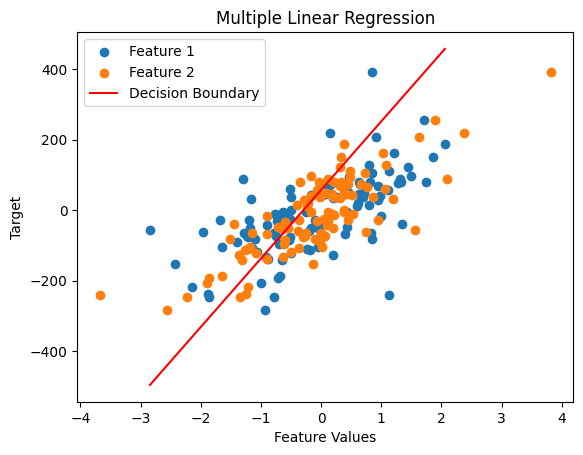

In [12]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=100, n_features=2, noise=10)

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X[:, 0], y, label='Feature 1')
plt.scatter(X[:, 1], y, label='Feature 2')

x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_pred = regressor.predict(np.c_[x1, x2])
plt.plot(x1, y_pred, color='red', label='Decision Boundary')

plt.xlabel('Feature Values')
plt.ylabel('Target')
plt.legend()
plt.title('Multiple Linear Regression')
plt.show()

binary logistic regression

In [ ]:
# diabetes_indices = np.where(y_test == 1)[0]
# no_diabetes_indices = np.where(y_test == 0)[0]

# diabetes_data = X_test[diabetes_indices]
# no_diabetes_data = X_test[no_diabetes_indices]

# plt.scatter(diabetes_data[:, 2], diabetes_data[:, 3], color='red', label='Diabetes')
# plt.scatter(no_diabetes_data[:, 2], no_diabetes_data[:, 3], color='blue', label='No Diabetes')

# plt.xlabel('Feature 2')
# plt.ylabel('Feature 3')
# plt.title('Diabetes vs No Diabetes')
# plt.legend()
# plt.show()

# linear_model = np.dot(X_test, classifier.weights) + classifier.bias
# y_pred = classifier.sigmoid(linear_model)

# plt.scatter(X_test[:, 2], X_test[:, 3], c=y_pred, cmap='viridis')
# plt.colorbar(label='Predicted Probability')
# plt.xlabel('Feature 2')
# plt.ylabel('Feature 3')
# plt.title('Sigmoid Function Predictions')
# plt.show()

# plt.scatter(classifier.sigmoid(np.dot(X_test[y_test == 0], classifier.weights) + classifier.bias), np.zeros(np.sum(y_test == 0)), color='blue', label='No Diabetes')
# plt.scatter(classifier.sigmoid(np.dot(X_test[y_test == 1], classifier.weights) + classifier.bias), np.ones(np.sum(y_test == 1)), color='red', label='Diabetes')

# plt.xlabel('Sigmoid Predictions')
# plt.ylabel('Actual Class')
# plt.title('Sigmoid Predictions vs Actual Class')
# plt.legend()
# plt.show()

# x = np.linspace(0, 1, 200)
# y_sigmoid = classifier.sigmoid(x)
# plt.plot(x, y_sigmoid, color='blue', label='Sigmoid Curve')
# plt.scatter(classifier.sigmoid(np.dot(X_test[y_test == 0], classifier.weights) + classifier.bias), np.zeros(np.sum(y_test == 0)), color='blue', label='No Diabetes')
# plt.scatter(classifier.sigmoid(np.dot(X_test[y_test == 1], classifier.weights) + classifier.bias), np.ones(np.sum(y_test == 1)), color='red', label='Diabetes')

# plt.xlabel('Sigmoid Predictions')
# plt.ylabel('Actual Class')
# plt.title('Sigmoid Predictions vs Actual Class')
# plt.legend()
# plt.show()


# plt.scatter(classifier.predict(X_test), y_test, color='blue')
# plt.xlabel('Predicted Probabilities of Positive Class')
# plt.ylabel('Actual Class')
# plt.title('Predicted Probabilities vs Actual Class')
# plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


class LogisticRegression:
    
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]
        return np.array(y_pred_class)

    def sigmoid(self, x):

        return 1 / (1 + np.exp(-x))


data = load_diabetes()
X, y = data.data, data.target



threshold = 150
y = np.array([1 if i >= threshold else 0 for i in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regressor = LogisticRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("accuracy is:", accuracy)


plt.scatter(X_test[y_test == 0], y_test[y_test == 0], color='blue', label='No Diabetes')
plt.scatter(X_test[y_test == 1], y_test[y_test == 1], color='red', label='Diabetes')
x_decision = np.linspace(X_test.min(), X_test.max(), 100)
y_decision = regressor.sigmoid(np.dot(x_decision.reshape(-1, 1), regressor.weights.reshape(1, -1)) + regressor.bias)

y_decision_class = np.where(y_decision >= 0.5, 1, 0)

plt.plot(X_test, y_test, color='black', label='decision boundary')
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('binary logistic regression')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class logistic_regression:
    def __init__(self, learning_rate=0.001, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = np.where(y_pred >= 0.5, 1, 0)
        return y_pred_class

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X[:, 0].reshape(-1, 1)
y = np.where(y > 0, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = logistic_regression(learning_rate=0.001, n_iters=100)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.scatter(X_test[y_test == 0], y_test[y_test == 0], color='blue', label='No Diabetes')
plt.scatter(X_test[y_test == 1], y_test[y_test == 1], color='red', label='Diabetes')

x_decision = np.linspace(X_test.min(), X_test.max(), 100)
y_decision = regressor.sigmoid(np.dot(x_decision.reshape(-1, 1), regressor.weights.reshape(1, -1)) + regressor.bias)
y_decision_class = np.where(y_decision >= 0.5, 1, 0)

plt.plot(x_decision, y_decision_class, color='black', label='Decision Boundary')
plt.xlabel('Age (Standardized)')
plt.ylabel('Diabetes')
plt.title('Binary Logistic Regression')
plt.legend()
plt.show()
